In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')


In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.shape

(10002, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

**Since there is only few missing value in entire dataset that's too in certain rows, we will drop these rows.**

In [6]:
df = df.dropna()

In [7]:
df.shape

(9998, 14)

**Drop irrelavant columns**

In [8]:
df = df.drop(columns=['RowNumber', 'CustomerId','Surname'])

# EDA

### Customer Exit Distribution

### Piechart showing customer churn distribution

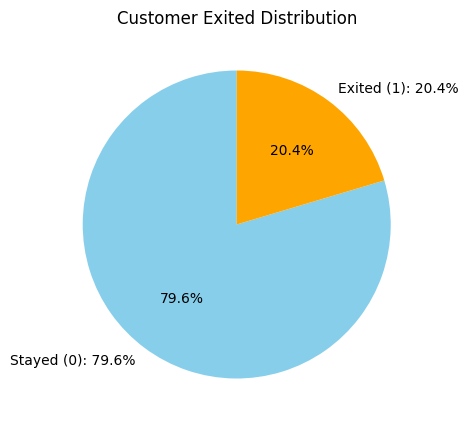

In [9]:
import matplotlib.pyplot as plt

exit_counts = df['Exited'].value_counts()
exit_percentages = df['Exited'].value_counts(normalize=True) * 100

labels = [f'Stayed (0): {exit_percentages[0]:.1f}%', f'Exited (1): {exit_percentages[1]:.1f}%']

plt.figure(figsize=(5, 5))
plt.pie(exit_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Customer Exited Distribution")
plt.show()


### Intrepretation: Data is imbalanced.

**Balance with Exited**

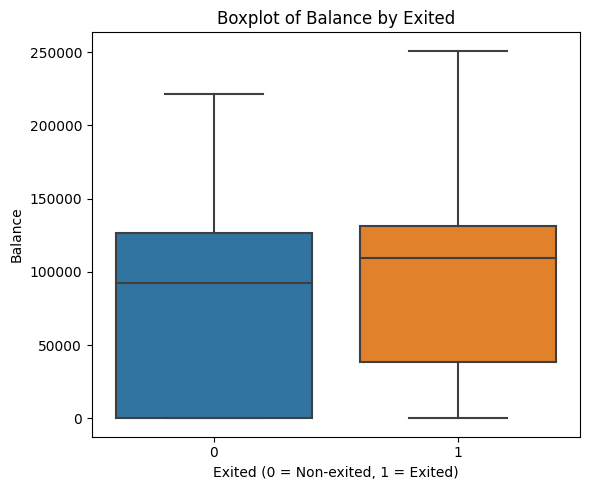

In [10]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Exited', y='Balance')
plt.title('Boxplot of Balance by Exited')
plt.xlabel('Exited (0 = Non-exited, 1 = Exited)')
plt.ylabel('Balance')
plt.tight_layout()
plt.show()


### Interpretation:

Customers with higher balances might be more likely to churn.The higher median balance for "Exited" customers suggests that the company might be losing its more valuable customers

Greater overall variability in balances for churned customers, potentially including some very high balances.








**Age Distribution by Geography and Exit**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


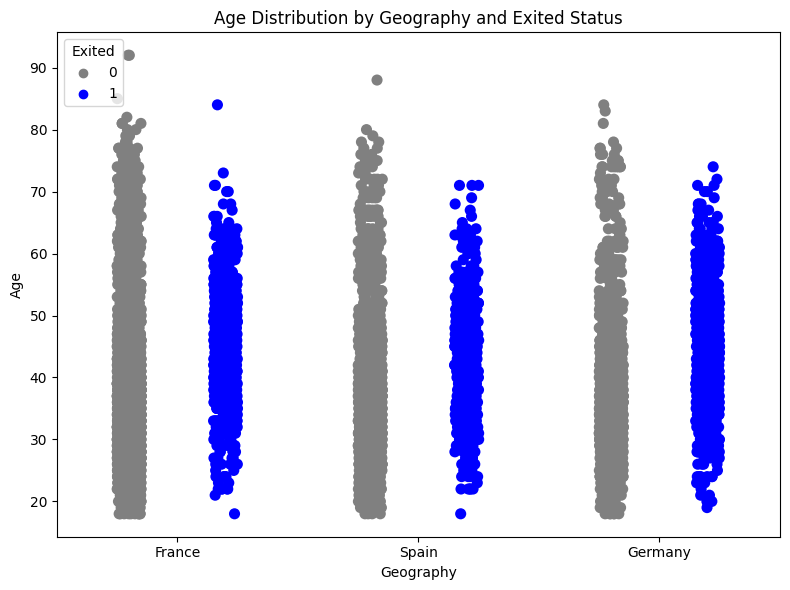

In [11]:
plt.figure(figsize=(8, 6))

sns.stripplot(
    data=df,
    x="Geography",  
    y="Age",        
    hue="Exited",    
    dodge=True,      
    jitter=True,    
    palette={0: "gray", 1: "blue"},  
    marker="o",      
    size=8           
)

plt.title('Age Distribution by Geography and Exited Status')
plt.xlabel('Geography')
plt.ylabel('Age')
plt.legend(title='Exited', loc='upper left')
plt.tight_layout()
plt.show()

### Interpretation:

The plot doesn't reveal any immediately striking relationships between age, location, and churn.  Visually, churn appears to be happening across all ages and in all locations relatively evenly.

**CreditScore distribution using the  cubehelix palette**

/tmp/ipykernel_93/3449805615.py:5: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(


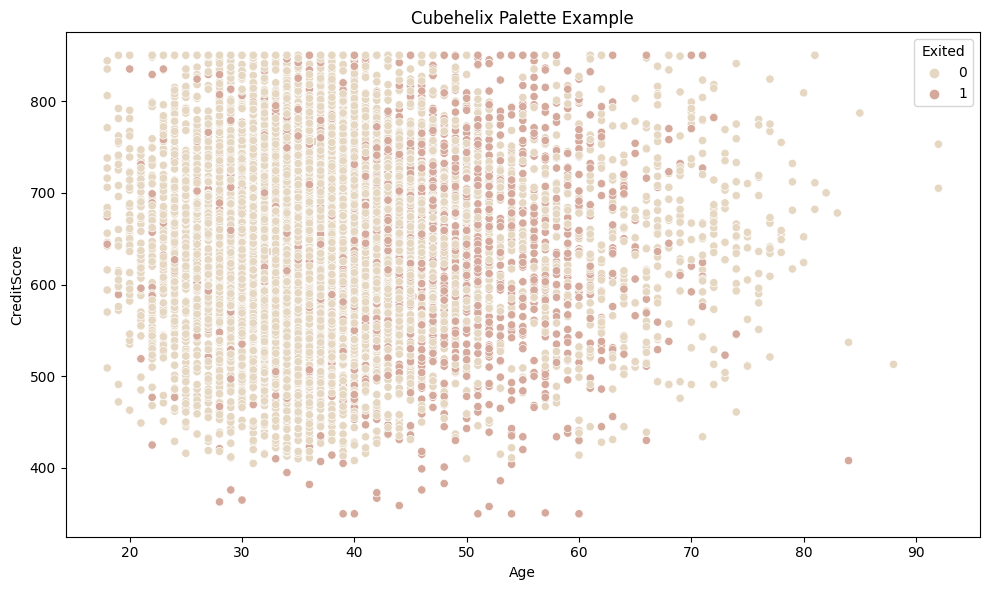

In [12]:
palette = sns.cubehelix_palette(start=0, rot=0.5)

# Plot CreditScore distribution using the  cubehelix palette
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="Age",
    y="CreditScore",
    hue="Exited",
    palette=palette
)
plt.title("Cubehelix Palette Example")
plt.tight_layout()
plt.show()


### Interpretation :

Older customers may be more likely to churn. Banks should investigate why churn occurs in this demographic—possibly due to dissatisfaction, product offerings not aligned with their needs.

**Bivariate Plot of CreditScore vs Age by Geography**

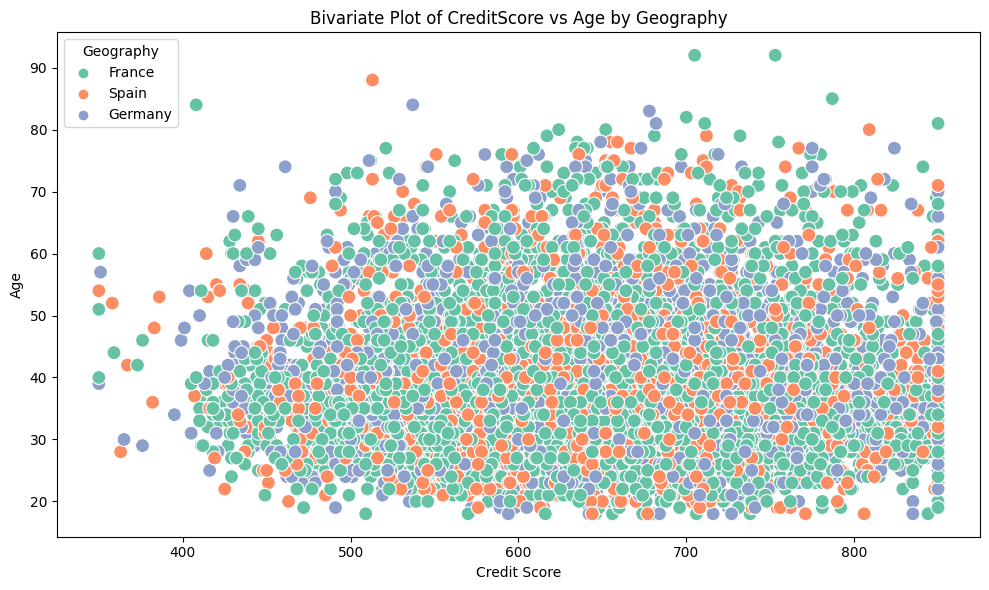

In [13]:
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x="CreditScore",
    y="Age",
    hue="Geography",  # Color by Geography
    palette="Set2",
    s=100  # Marker size
)

plt.title('Bivariate Plot of CreditScore vs Age by Geography')
plt.xlabel('Credit Score')
plt.ylabel('Age')
plt.tight_layout()
plt.show()


### Interpretation:

There may not be a significant geographic bias in Credit Scores or Age. Each geography seems to follow a similar pattern.While age and credit score don't show strong trends, interactions with geography or other features (like income or tenure) might reveal more meaningful patterns.

**Distribution of Age and Salary by Exited Status**

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


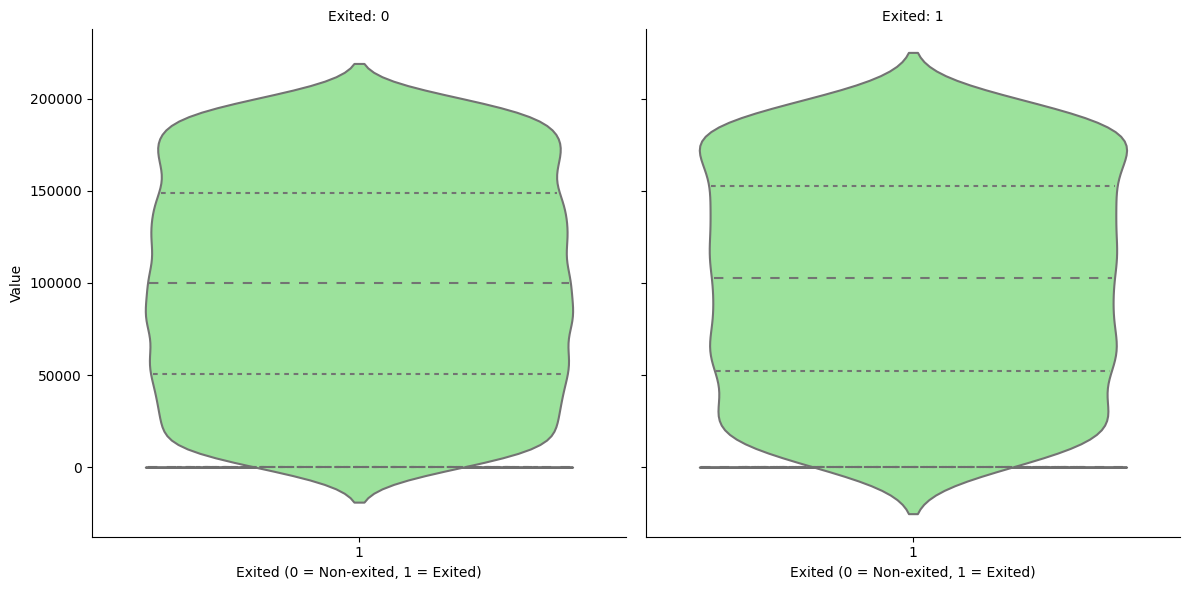

In [14]:
g = sns.FacetGrid(df, col='Exited', height=6)
g.map(sns.violinplot, 'Exited', 'Age', inner="quart", color="skyblue")
g.map(sns.violinplot, 'Exited', 'EstimatedSalary', inner="quart", color="lightgreen")

g.set_axis_labels('Exited (0 = Non-exited, 1 = Exited)', 'Value')
g.set_titles('Exited: {col_name}')
plt.tight_layout()
plt.show()


### Interpretation:

The similar distribution between churned and non-churned customers suggests that salary levels do not significantly influence a customer's likelihood to churn.


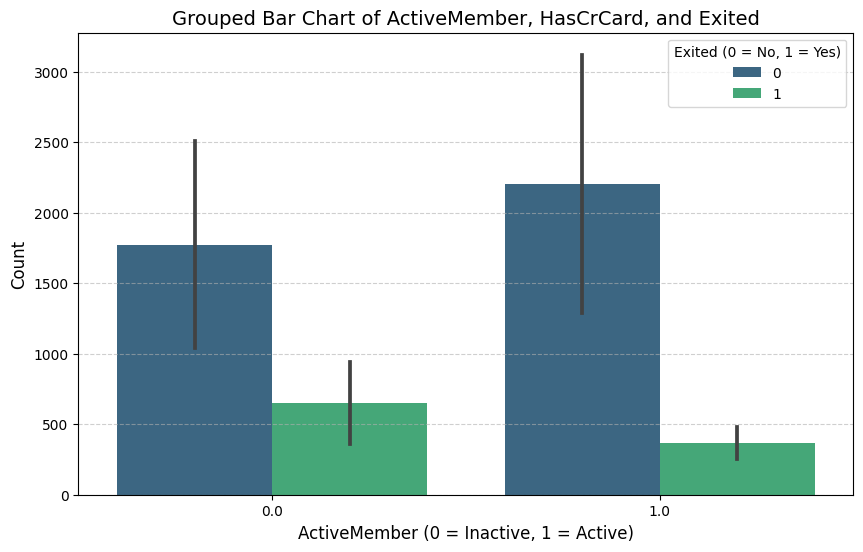

In [15]:
grouped_data = df.groupby(["IsActiveMember", "HasCrCard", "Exited"]).size().reset_index(name="Count")

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_data,
    x="IsActiveMember",
    y="Count",
    hue="Exited",
    palette="viridis",
    dodge=True
)

# Customize the chart
plt.title("Grouped Bar Chart of ActiveMember, HasCrCard, and Exited", fontsize=14)
plt.xlabel("ActiveMember (0 = Inactive, 1 = Active)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Exited (0 = No, 1 = Yes)")
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show the plot
plt.show()


**Interpretation:**

1. Being ActiveMember appears to outweigh credit card ownership in importance for reducing churn.

2. Being an active member  correlate negatively with churn.

3. Inactive membership appears to be a strong indicator of churn.



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

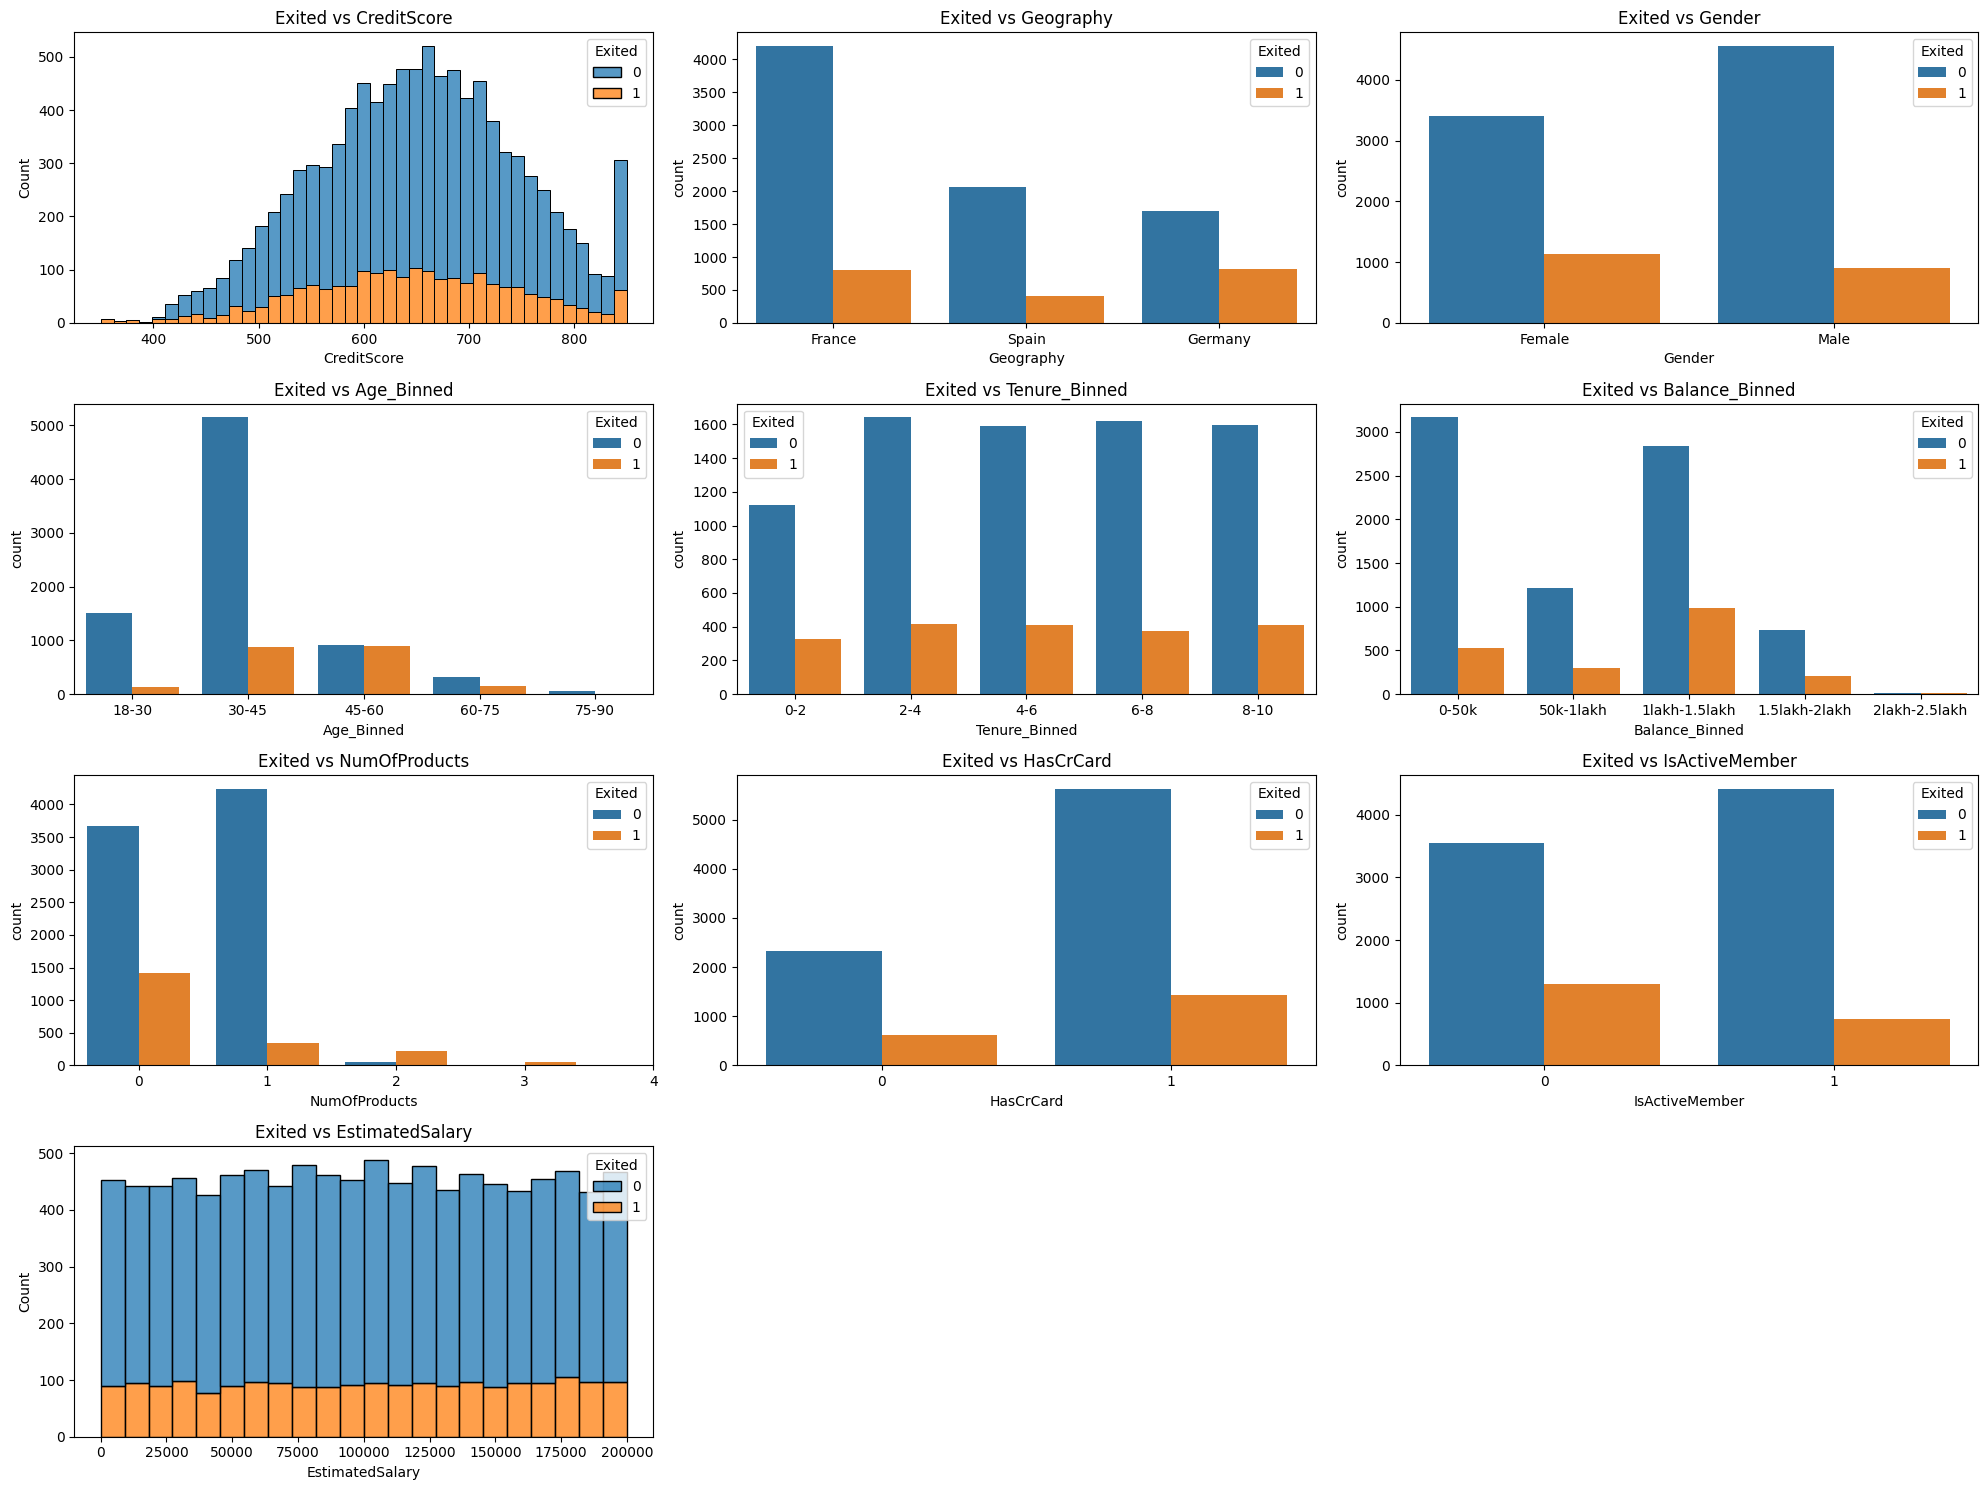

In [16]:
import seaborn as sns

age_bins = [18,30,45,60,75,90]
age_labels = ['18-30','30-45','45-60','60-75','75-90']
df["Age_Binned"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels, right=False)


Tenure_bins = [0,2,4,6,8,10]
Tenure_labels = ['0-2','2-4','4-6','6-8','8-10']
df["Tenure_Binned"] = pd.cut(df["Tenure"], bins=Tenure_bins, labels=Tenure_labels, right=False)


Balance_bins = [0,50000,100000,150000,200000,250000]
Balance_labels = ["0-50k", "50k-1lakh", "1lakh-1.5lakh", "1.5lakh-2lakh", "2lakh-2.5lakh"]
df["Balance_Binned"] = pd.cut(df["Balance"], bins=Balance_bins, labels=Balance_labels, right=False)


relevant_vars = ["CreditScore", "Geography", "Gender", "Age_Binned", "Tenure_Binned", "Balance_Binned", 
                 "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, var in enumerate(relevant_vars):
    if var == "HasCrCard":
        sns.countplot(data=df, x=var, hue="Exited", ax=axes[i])
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(["0", "1"])
    elif var == "NumOfProducts":
        sns.countplot(data=df, x=var, hue="Exited", ax=axes[i])
        axes[i].set_xticks(range(5))
        axes[i].set_xticklabels([0, 1, 2, 3, 4])
    elif var == "IsActiveMember":
        sns.countplot(data=df, x=var, hue="Exited", ax=axes[i])
        axes[i].set_xticks([0, 1])
        axes[i].set_xticklabels(["0", "1"])
    elif var in ["Age_Binned", "Tenure_Binned", "Balance_Binned", "Geography", "Gender"]:
        sns.countplot(data=df, x=var, hue="Exited", ax=axes[i])
    else:
        sns.histplot(data=df, x=var, hue="Exited", multiple="stack", kde=False, ax=axes[i])
    axes[i].set_title(f"Exited vs {var}")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




**General Interpretation from Visualization**
1. As NumOfProducts increases, number of customers exited decreases.
2. Exit rate is high among females compared to males, suggesting bank needs to have policy which will help to retain female customers.
3. Exit rate is high among inactive member compared to active members.
4. Exit rate is high among  member having credit card rather than  members not having credit card.
5. As credit score improves, exit rate decrease.
6. Germany has highest no. of members exiting compared to other locations.
7. Customers within age group of 45-60 has highest exit rate(around 50%) among all age bins.
8. No specific trend observed from salary,Trend.

**Dropped binned columns**

In [17]:
binned_columns = ["Age_Binned", "Tenure_Binned", "Balance_Binned"]
df = df.drop(columns = binned_columns)

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


### Detecting outlier

In [18]:
import pandas as pd

# Calculate IQR for detecting outliers
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # Detect outliers using the IQR method
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

# Apply outlier detection for numerical columns
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts']  # Adjust as needed
outlier_counts = detect_outliers_iqr(df[numerical_columns])
print("Outliers detected in each feature:\n", outlier_counts)


Outliers detected in each feature:
 CreditScore       15
Age              359
Tenure             0
Balance            0
NumOfProducts     60
dtype: int64


**Interpretation:**
Outliers are part of the natural variability in the data and won’t affect your model significantly, we will  ignore them and proceed with your analysis. Alternatively, since number is age is relatively higher we would have log transformed them to reduce the impact of outliers on the model.

# Feature Selection & Engineering

## **Correlation analysis**

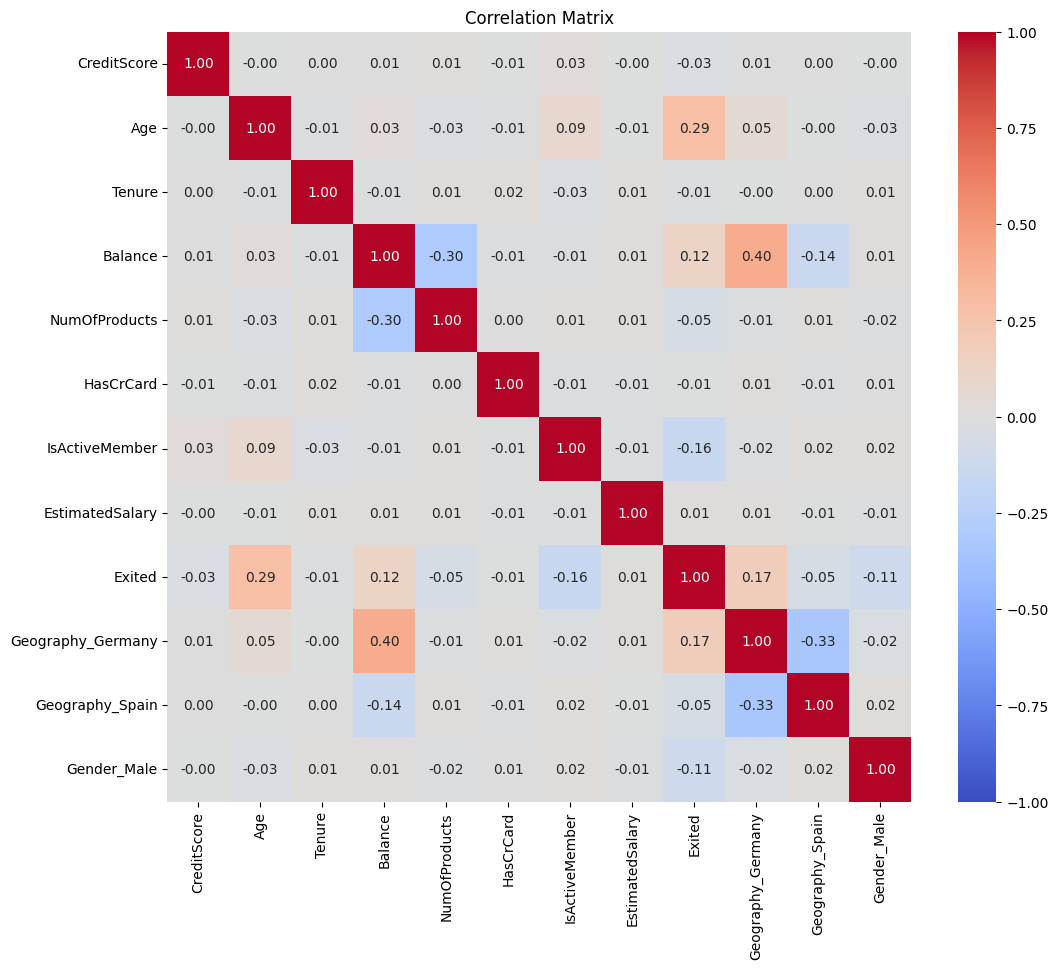

In [19]:
df_encoded = pd.get_dummies(df,columns= ['Geography','Gender'], drop_first = True)

numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", 
                     "IsActiveMember", "EstimatedSalary", "Exited"] + list(df_encoded.columns[-3:])

correlation_matrix = df_encoded[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

Correlation analysis help to find linear relationship between different set of variables. Since none of the features has strong or moderate correlation with target variable exit we will go for feature selection

## **Feature selection Using Random Forest**



              Feature  Importance
1                 Age    0.239951
0         CreditScore    0.145867
7     EstimatedSalary    0.145320
3             Balance    0.141928
4       NumOfProducts    0.127165
2              Tenure    0.081163
6      IsActiveMember    0.040977
8   Geography_Germany    0.027869
5           HasCrCard    0.018721
10        Gender_Male    0.018306
9     Geography_Spain    0.012733


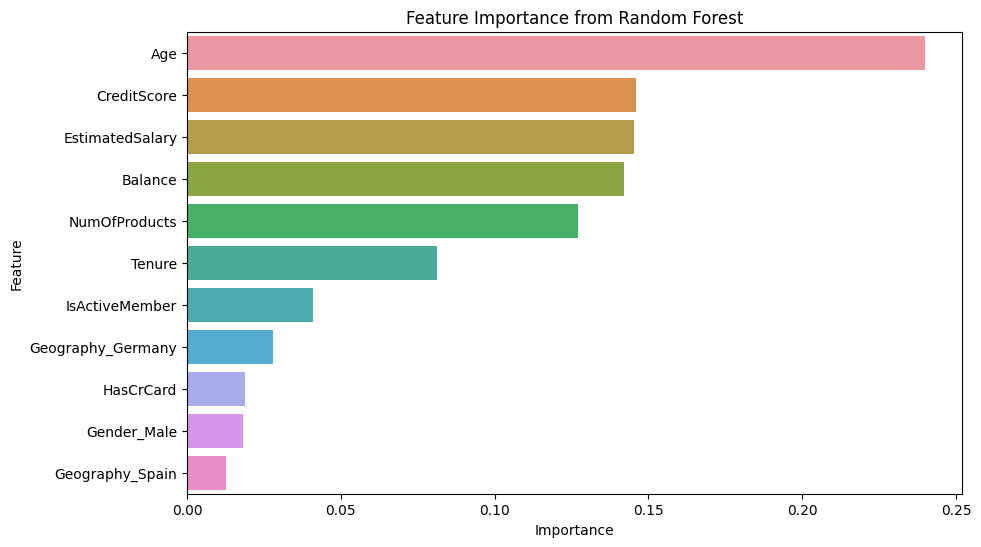

In [20]:
 from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example DataFrame
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Prepare features and target
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


**Top 5 Features contributing to Exit : Age, CreditScore,EstimatedSalary, Balance and NumOfProducts. Now we will create the interaction terms basis this 5 features.**

In [21]:
df['Age_CreditScore'] = df['Age'] * df['CreditScore']
df['Age_EstimatedSalary'] = df['Age'] * df['EstimatedSalary']
df['CreditScore_EstimatedSalary'] = df['CreditScore'] * df['EstimatedSalary']
df['Age_Balance'] = df['Age'] * df['Balance']
df['CreditScore_Balance'] = df['CreditScore'] * df['Balance']
df['Age_NumOfProducts'] = df['Age'] * df['NumOfProducts']
df['CreditScore_NumOfProducts'] = df['CreditScore'] * df['NumOfProducts']
df['EstimatedSalary_Balance'] = df['EstimatedSalary'] * df['Balance']
df['Balance_NumOfProducts'] = df['Balance'] * df['NumOfProducts']
df['Age_CreditScore_Balance'] = df['Age'] * df['CreditScore'] * df['Balance']
df['Age_EstimatedSalary_NumOfProducts'] = df['Age'] * df['EstimatedSalary'] * df['NumOfProducts']
df['CreditScore_EstimatedSalary_Balance'] = df['CreditScore'] * df['EstimatedSalary'] * df['Balance']
df['Balance_NumOfProducts_IsActive'] = df['Balance'] * df['NumOfProducts'] * df['IsActiveMember']
df['Age_CreditScore_HasCrCard'] = df['Age'] * df['CreditScore'] * df['HasCrCard']
df['EstimatedSalary_Balance_NumOfProducts'] = df['EstimatedSalary'] * df['Balance'] * df['NumOfProducts']


**Performing correlation matrix on new modified dataframe** 

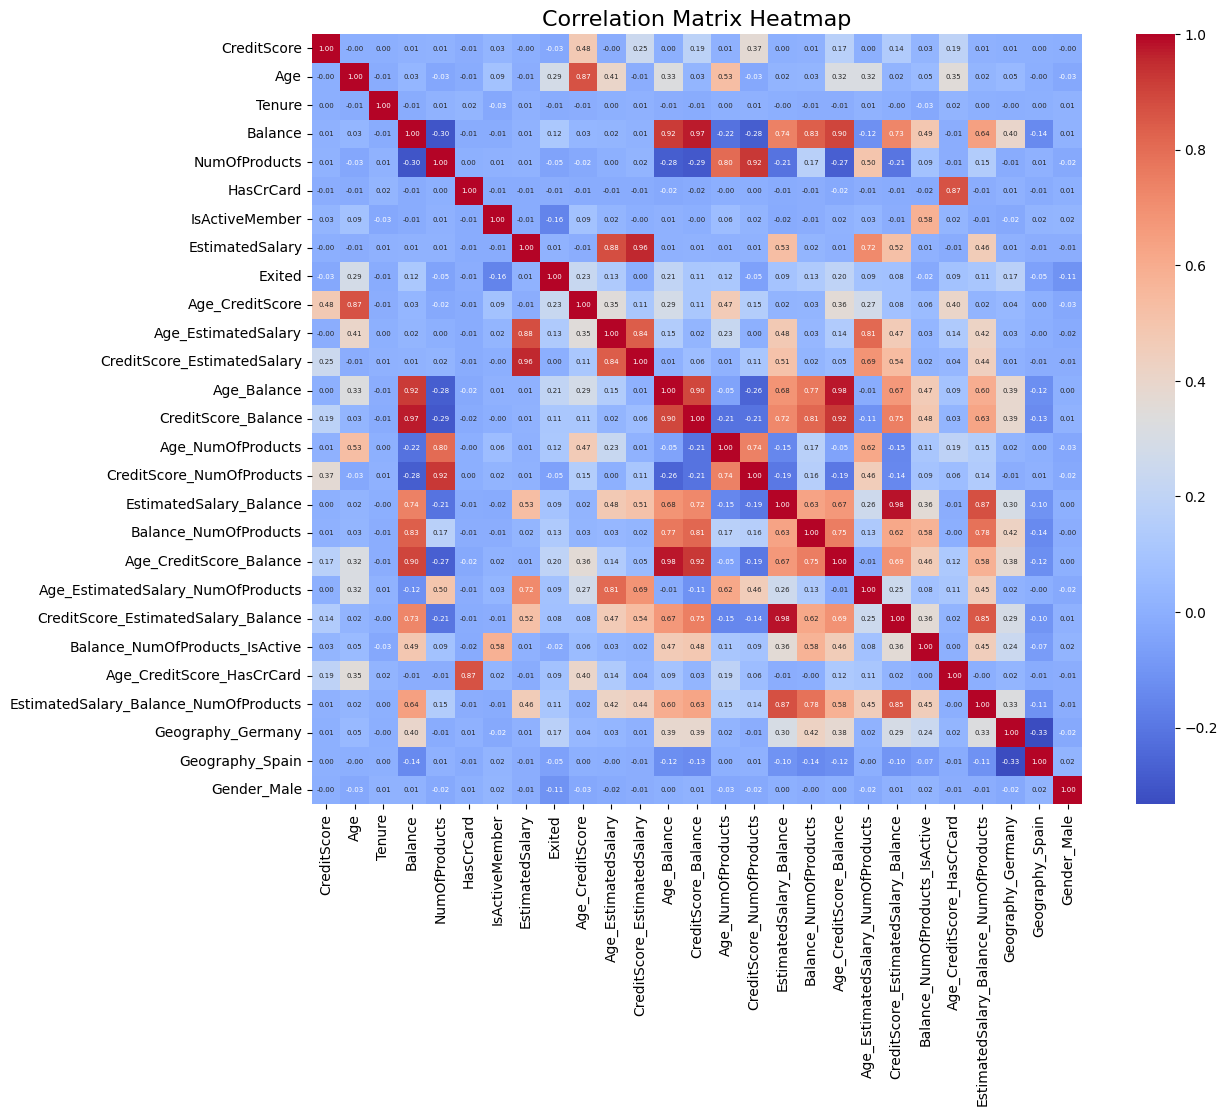

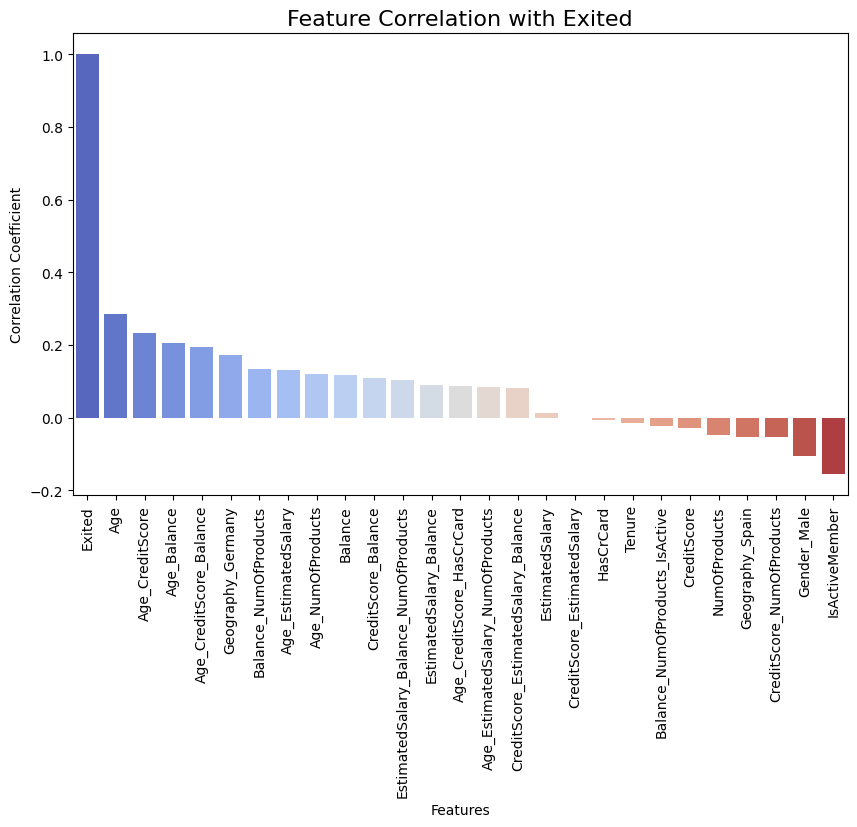

In [22]:
df_encoded = pd.get_dummies(df, drop_first=True)

correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,                
    fmt=".2f",                 
    cmap="coolwarm",           
    cbar=True,                 
    square=True,               
    annot_kws={"size": 5}    
)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

# Get correlation with the target variable 'Exited'
correlation_with_target = correlation_matrix['Exited'].sort_values(ascending=False)

# Plot feature correlation with Exited
plt.figure(figsize=(10, 6))
sns.barplot(
    x=correlation_with_target.index,
    y=correlation_with_target.values,
    palette="coolwarm"
)
plt.xticks(rotation=90)
plt.title("Feature Correlation with Exited", fontsize=16)
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()


# Customer Segmentation Using Clustering

### **k-nearest neighbors (kNN)**  

## Finding Elbow point for kNN

**The elbow method is a technique used to determine the optimal number of clusters in clustering algorithms like K-Means.**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

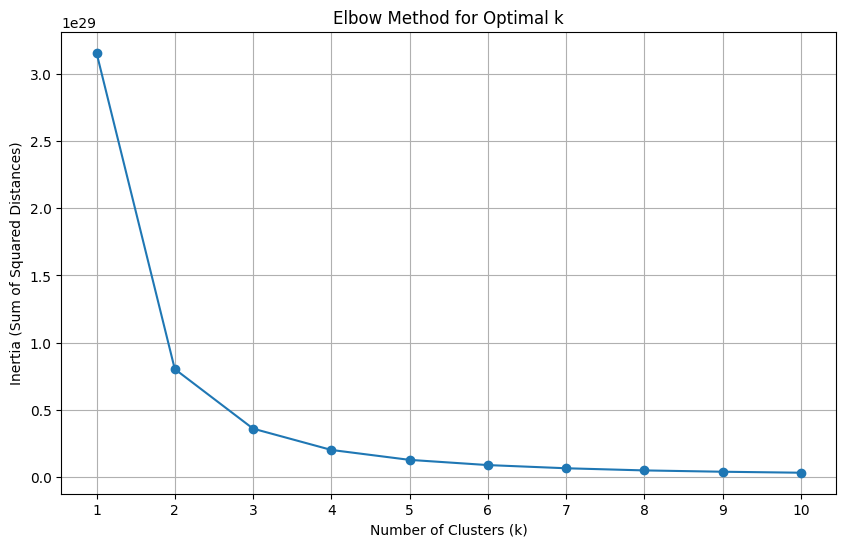

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# One-Hot Encode categorical features 
df_encoded = pd.get_dummies(df, drop_first=True)

inertia_values = []

# Loop over a range of k values to find the elbow
for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


### **K Means Neighbor**

It’s the point on the graph where the rate of decrease of WCSS slows down. This is where you should choose the optimal number of clusters, from baove it is visible that elbow point for data is 2.

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


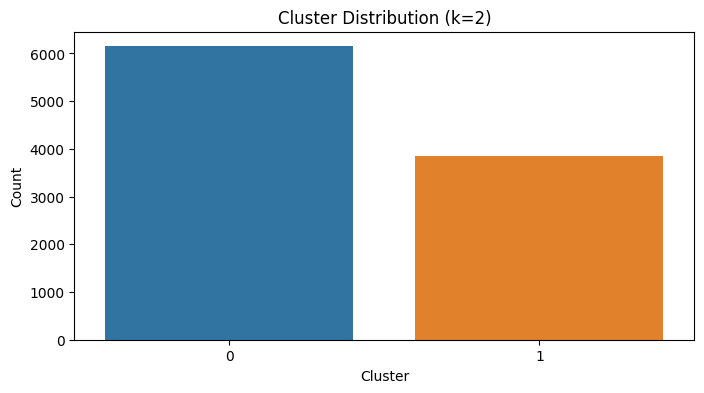

Cluster Centers:
    CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0     0.014278  0.035768 -0.010288  0.731402      -0.251708  -0.016902   
1    -0.022810 -0.057142  0.016436 -1.168457       0.402119   0.027002   

   IsActiveMember  EstimatedSalary  Age_CreditScore  Age_EstimatedSalary  ...  \
0        0.000155         0.035683         0.036832             0.044320  ...   
1       -0.000248        -0.057006        -0.058842            -0.070804  ...   

   Balance_NumOfProducts  Age_CreditScore_Balance  \
0               0.608617                 0.662941   
1              -0.972301                -1.059087   

   Age_EstimatedSalary_NumOfProducts  CreditScore_EstimatedSalary_Balance  \
0                          -0.077276                             0.544867   
1                           0.123452                            -0.870456   

   Balance_NumOfProducts_IsActive  Age_CreditScore_HasCrCard  \
0                        0.358259                  -0.00221

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming df is your original DataFrame
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Separate features and target
X = df_encoded.drop(columns=['Exited'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster Distribution Visualization
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=df)
plt.title('Cluster Distribution (k=2)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Cluster Centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers:\n", cluster_centers)

# Detailed Cluster Analysis
cluster_analysis = cluster_centers.copy()
cluster_analysis['Cluster'] = cluster_analysis.index

print("\nCluster Analysis:")
print(cluster_analysis)


## Cluster Analysis Interpretation and Business Insights

The two clusters from the KMeans clustering with `k=2` show distinct differences in the features. Below is a detailed interpretation of the cluster centers and what each cluster represents, followed by the business insights you can derive.

### **Cluster 0:**
- **Credit Score**: Slightly higher than average (positive value), indicating customers with generally good credit scores.
- **Age**: Slightly above average (positive value), suggesting these customers are moderately aged.
- **Tenure**: Almost neutral (near zero), indicating that customers in this cluster are diverse in terms of their account tenure.
- **Balance**: Significantly higher (positive value), indicating these customers tend to have higher account balances.
- **NumOfProducts**: Slightly negative, suggesting customers in this cluster hold fewer products or services.
- **HasCrCard**: Almost neutral (slightly negative), indicating that these customers are somewhat evenly distributed in terms of whether they have a credit card.
- **IsActiveMember**: Nearly neutral (very small positive value), suggesting these customers are marginally active.
- **Estimated Salary**: Positive, meaning these customers tend to have higher estimated salaries.

### Key Characteristics of Cluster 0:
- Customers are typically moderate to high-income individuals with larger account balances.
- They are not highly diverse in terms of the number of products they hold.
- These customers may represent higher-value clients, and their behavior could be influenced by factors such as income and account balance rather than engagement or diversity of services.

### **Cluster 1:**
- **Credit Score**: Slightly negative, suggesting customers in this group have somewhat lower credit scores.
- **Age**: Slightly below average (negative value), indicating these customers tend to be younger.
- **Tenure**: Slightly positive, meaning these customers are typically more experienced with the company.
- **Balance**: Significantly negative, indicating lower account balances.
- **NumOfProducts**: Positive, suggesting these customers hold more products or services.
- **HasCrCard**: Slightly positive, meaning a higher proportion of these customers have credit cards.
- **IsActiveMember**: Slightly negative, indicating lower activity levels for these customers.
- **Estimated Salary**: Negative, meaning these customers likely have lower salaries compared to Cluster 0.

### Key Characteristics of Cluster 1:
- These customers are likely younger with lower income and account balances.
- They hold a more diverse range of products but are not as engaged or active as customers in Cluster 0.
- This group might represent a more budget-conscious or price-sensitive demographic.

## Business Insights

### 1. **Targeted Marketing:**
- **Cluster 0** customers with higher balances, higher credit scores, and higher estimated salaries are prime candidates for high-end services, premium products, or investment offerings. Marketing messages targeting wealth management or exclusive financial products could resonate well with this group.
- **Cluster 1** customers are more likely to be younger and have lower incomes, which could indicate a preference for budget-friendly products, lower-cost financial services, or entry-level offerings. You could target this group with affordable plans or introductory packages.

### 2. **Product and Service Customization:**
- For **Cluster 0**, personalized offers such as loyalty programs, wealth management services, or exclusive deals might increase customer retention and lifetime value.
- For **Cluster 1**, focusing on products that offer good value for money, such as low-interest loans, budget plans, or introductory packages, would cater to their budget-conscious needs.

### 3. **Cross-Selling Opportunities:**
- **Cluster 0** shows low diversity in product holdings. This could indicate opportunities for cross-selling more financial products to these customers, such as insurance, personal loans, or credit cards.
- **Cluster 1** has a higher number of products per customer, which could present opportunities to offer complementary services or upsell premium versions of their existing products.

### 4. **Customer Engagement and Retention:**
- **Cluster 0** customers may be less engaged despite their high value. Developing a loyalty program or offering personalized communication could enhance their engagement.
- **Cluster 1** customers are less active. Implementing campaigns focused on improving account activity, like offering incentives for using certain services or adding more products, could help increase engagement.

### 5. **Risk Management:**
- Given **Cluster 1** customers have lower credit scores and higher product diversity, these customers could pose a higher credit risk. The company could apply tighter credit checks or limit offerings to these customers to reduce potential losses.
- **Cluster 0** customers, with better credit scores and higher income, may be less risky and could be eligible for premium or higher-limit products with lower risk of default.

## Conclusion

The clustering analysis divides your customer base into two distinct groups, each with unique behaviors and attributes. By tailoring your marketing, product offerings, and engagement strategies to the specific characteristics of each cluster, you can enhance customer satisfaction, improve cross-sell opportunities, and manage risk more effectively.


# Modelling

##  Modelling using Logistic Regression,SVM, XGBoost and Random Forest after SMOTE

In [25]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score



# Encoding categorical variables 
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Standardize the data 
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Step 4: Define the models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}

# Train the models and evaluate them
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_res, y_train_res)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC-ROC for probability predictions
    report = classification_report(y_test, y_pred)
    
    results[model_name] = {
        "accuracy": accuracy,
        "auc_roc": auc_roc,
        "classification_report": report
    }

# Step 6: Print the results
for model_name, result in results.items():
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"AUC-ROC: {result['auc_roc']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
Accuracy: 0.7543
AUC-ROC: 0.7512
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      2380
           1       0.43      0.58      0.49       620

    accuracy                           0.75      3000
   macro avg       0.65      0.69      0.67      3000
weighted avg       0.79      0.75      0.77      3000


SVM Results:
Accuracy: 0.8423
AUC-ROC: 0.8500
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2380
           1       0.61      0.65      0.63       620

    accuracy                           0.84      3000
   macro avg       0.76      0.77      0.76      3000
weighted avg       0.85      0.84      0.84      3000


Random Forest Results:
Accuracy: 0.8490
AUC-ROC: 0.8577
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2380
 

## Implication(Savings) due to Random Forest Classifier:

### Random Forest Results:
- **Accuracy:** 0.8480
- **AUC-ROC:** 0.8602

**Classification Report:**
          precision    recall  f1-score   support

       0       0.90      0.91      0.90      2380
       1       0.64      0.61      0.63       620

accuracy                           0.85      3000


---

---

### 1. **Current Churn Rate:**
The current churn rate is **20.4%**.

**Total churners before corrective action:**

Total churners = 20.4% × 9998 = 2040 churners

---

### 2. **Model's Performance:**
The model identifies **61%** of the churners (based on recall).

**Churners retained:**

Churners retained = 61% × 2040 = 1244 churners retained

**Churn reduction:**

Churn reduction = 1244 churners retained

---

### 3. **New Churn Rate:**
**Remaining churners:**

Remaining churners = 2040 - 1244 = 796 churners remaining

**New churn rate:**

New churn rate = (796 / 9998) × 100 = 7.96%

So, after corrective actions, the churn rate drops from **20.4%** to **7.96%**.

---

### 4. **Financial Impact of Churn Reduction:**
**Financial impact per customer:** ₹1000

**Total financial impact:**

Total financial impact = 1244 × ₹1000 = ₹1,244,000

---

### **Summary of Financial Impact:**
- **Before corrective action:** 2040 churners (churn rate = 20.4%).
- **After corrective action:** 796 churners (churn rate = 7.96%).
- **Churn reduction:** 1244 churners retained.
- **Financial impact:** ₹1,244,000 (savings from retained customers).


AUC-ROC Score for Random Forest: 0.8579


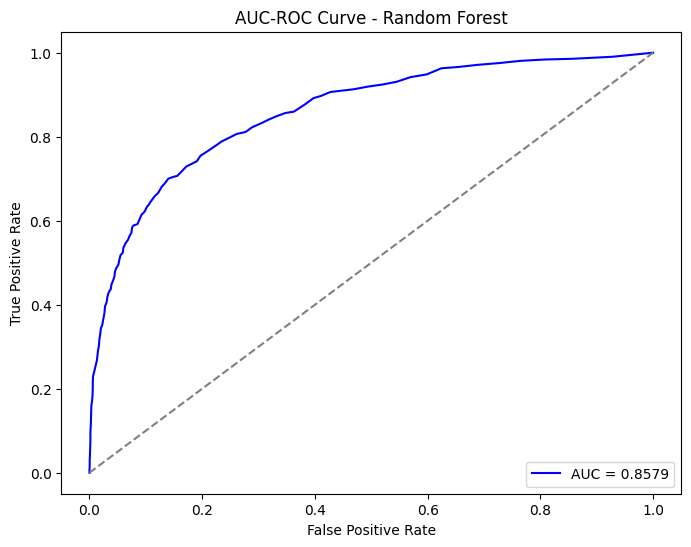

<Figure size 800x600 with 0 Axes>

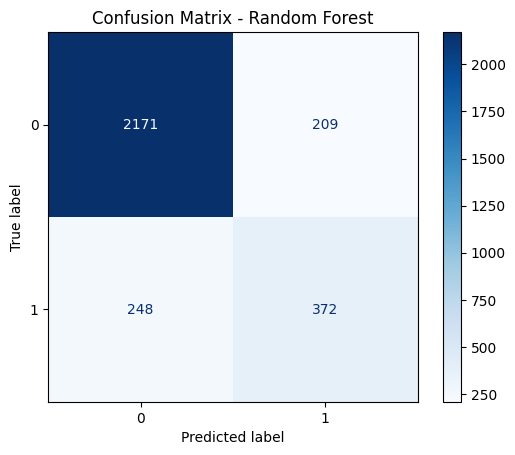

AUC-ROC Score for SVM: 0.8500


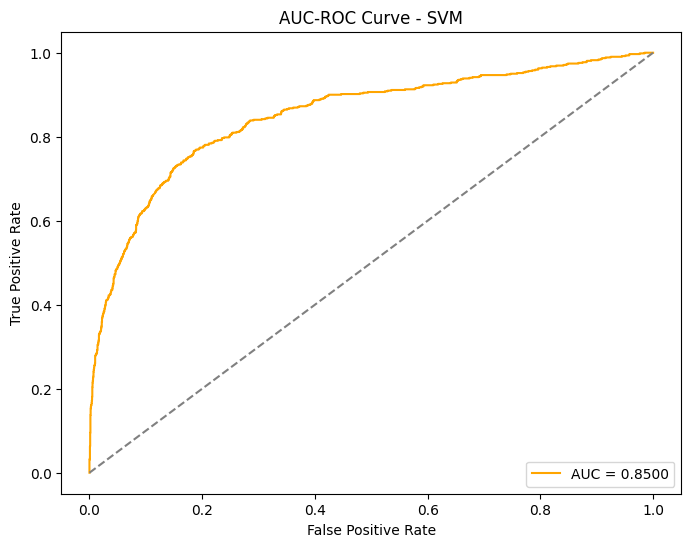

<Figure size 800x600 with 0 Axes>

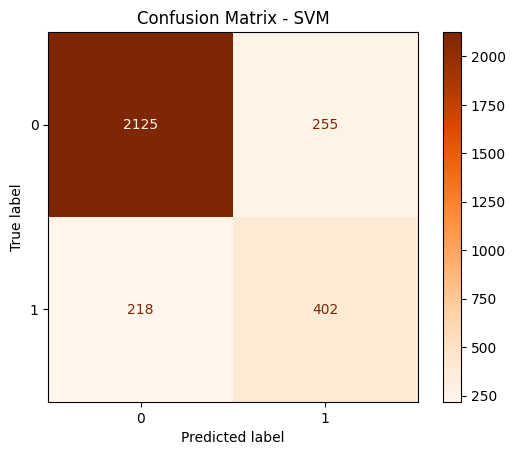

In [26]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve


df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

X = df_encoded.drop(columns=['Exited'])
y = df_encoded['Exited']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Train SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_res, y_train_res)

# Create models dictionary for evaluation
models = {
    "Random Forest": rf_model,
    "SVM": svm_model
}

# Random Forest
rf_model = models["Random Forest"]
y_pred_rf = rf_model.predict(X_test)  # Predicted labels
y_pred_probs_rf = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities

# AUC-ROC for Random Forest
auc_score_rf = roc_auc_score(y_test, y_pred_probs_rf)
print(f"AUC-ROC Score for Random Forest: {auc_score_rf:.4f}")

# Plot AUC-ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_probs_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {auc_score_rf:.4f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)

# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.show()


#  SVM Evaluation 
svm_model = models["SVM"]
y_pred_svm = svm_model.predict(X_test)  # Predicted labels
y_pred_probs_svm = svm_model.predict_proba(X_test)[:, 1]  # Predicted probabilities

# AUC-ROC for SVM
auc_score_svm = roc_auc_score(y_test, y_pred_probs_svm)
print(f"AUC-ROC Score for SVM: {auc_score_svm:.4f}")

# Plot AUC-ROC curve for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_probs_svm)
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'AUC = {auc_score_svm:.4f}', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve - SVM')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)

# Plot Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
disp_svm.plot(cmap=plt.cm.Oranges)
plt.title('Confusion Matrix - SVM')
plt.show()


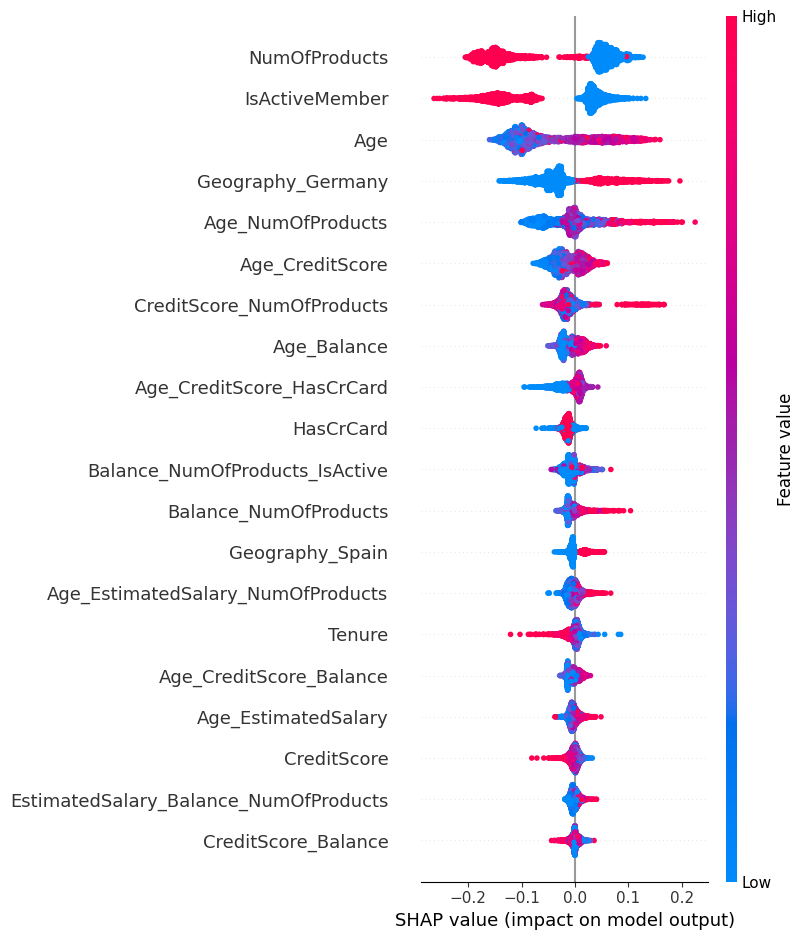

<Figure size 1000x800 with 0 Axes>

In [27]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# --- SHAP Analysis for Random Forest ---
X_test_df = pd.DataFrame(X_test, columns=X.columns)  # Convert if necessary

explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test_df)

#  Global Explanation (Feature Importance)
plt.figure(figsize=(10, 8))  
shap.summary_plot(shap_values[1], X_test_df, feature_names=X.columns)

#  Local Explanation (Individual Prediction Contribution) 
shap.initjs()

# Generate the force plot for a specific sample 
plt.figure(figsize=(10, 8))
shap.force_plot(
    explainer.expected_value[1],  
    shap_values[1][0],             # SHAP values for the first sample
    X_test_df.iloc[0],             # Features of the first sample
    feature_names=X.columns       
)

plt.show()


## Interpretation

NumOfProducts :  High values (red) of NumOfProducts are strongly associated with negative SHAP values (pushing the prediction lower). This means customers with more products are less likely to churn. This is a very strong indicator and makes intuitive sense – the more integrated a customer is with your offerings, the less likely they are to leave.

IsActiveMember : Low values (blue) of IsActiveMember are associated with positive SHAP values, indicating that inactive members are more likely to churn. This is another crucial finding. It highlights the importance of engaging customers and keeping them active.

Age : The complex relationship with age suggests that churn behavior might differ across age groups.  While younger customers might churn for different reasons (e.g., price sensitivity, exploring alternatives), older customers might have other drivers (e.g., dissatisfaction with service, changing needs).  Further investigation is needed to understand these age-related patterns.

Geography_Germany: The negative SHAP values for Geography_Germany suggest that customers in Germany are less likely to churn. This could be due to various factors specific to that region, such as market conditions, competition, or cultural preferences.

Features with Low Impact (HasCrCard, Tenure, CreditScore):  These features have a relatively low impact on churn prediction compared to the others. While they might still play a minor role, focusing on NumOfProducts, IsActiveMember, and understanding the age dynamics would likely yield a higher return on investment for churn reduction efforts.

**Actionable Insights for Churn Reduction:**

Focus on Increasing Product Adoption: Strategies to encourage customers to use more products are likely to be very effective in reducing churn. This could involve bundling offers, personalized recommendations, or loyalty programs.

Improve Customer Engagement: Actively engaging customers and ensuring they remain active members is critical. This could include targeted content, personalized communication, or proactive customer support.

Investigate Age-Related Churn Drivers: Conduct further analysis to understand why different age groups churn. This could involve surveys, focus groups, or analyzing customer feedback. Tailor retention strategies to address the specific needs of each group.

Understand the "Germany Effect": Investigate the reasons behind the lower churn rate in Germany. Are there best practices or market conditions in that region that can be replicated elsewhere?

Consider Resource Allocation: Given the relatively low impact of features like CreditScore and HasCrCard, resources might be better allocated to initiatives that focus on the more influential factors.

# Assigning Probability to customers using Random Forest Classifier and classify them as Low, Medium and High Category

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Features and target
X = df_encoded.drop(columns=['Exited'])  # Assuming 'Exited' is the target variable for churn
y = df_encoded['Exited']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Store the original indices for the test set to align predictions later
test_indices = X_test.index

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Standardize the data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Predict probabilities on the test set
y_pred_probs_rf = rf_model.predict_proba(X_test)[:, 1]  # Churn probability for class 1 (Exited)

# Assign categories based on probability thresholds
def assign_churn_category(prob):
    if prob < 0.3:
        return 'Low'
    elif 0.3 <= prob <= 0.75:
        return 'Medium'
    else:
        return 'High'

churn_categories = [assign_churn_category(prob) for prob in y_pred_probs_rf]

df_with_categories = df.loc[test_indices].copy()  # Get the subset of df corresponding to X_test
df_with_categories['Churn_Probability'] = y_pred_probs_rf
df_with_categories['Churn_Category'] = churn_categories

print(df_with_categories[['Churn_Probability', 'Churn_Category']].head())

# Evaluate Random Forest model with AUC-ROC and classification report
print(f"AUC-ROC for Random Forest: {roc_auc_score(y_test, y_pred_probs_rf)}")
print("Random Forest Classification Report:\n", classification_report(y_test, rf_model.predict(X_test)))


      Churn_Probability Churn_Category
4126               0.05            Low
4069               0.10            Low
1735               0.20            Low
4744               0.88           High
6395               0.21            Low
AUC-ROC for Random Forest: 0.8578856058552452
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      2380
           1       0.64      0.60      0.62       620

    accuracy                           0.85      3000
   macro avg       0.77      0.76      0.76      3000
weighted avg       0.84      0.85      0.85      3000



# Analyze and understand the reasoning of churn for Medium and High Risk Customers

**Churn Category Distribution**

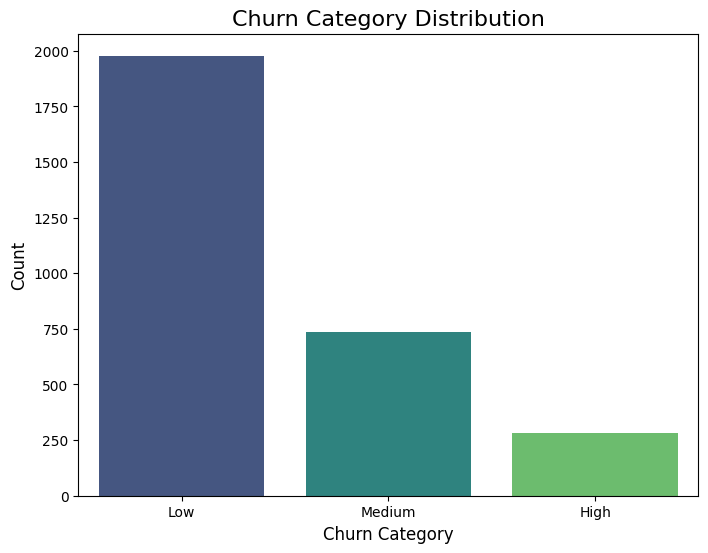

In [29]:
churn_category_counts = df_with_categories['Churn_Category'].value_counts()

# Plot the churn category counts
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_category_counts.index, y=churn_category_counts.values, palette='viridis')

plt.title('Churn Category Distribution', fontsize=16)
plt.xlabel('Churn Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()



### Interpretation:

The distribution suggests a relatively healthy customer base with a large proportion of low-risk customers. However, there's still a sizable segment in the "Medium" and "High" categories that requires attention to prevent potential churn.



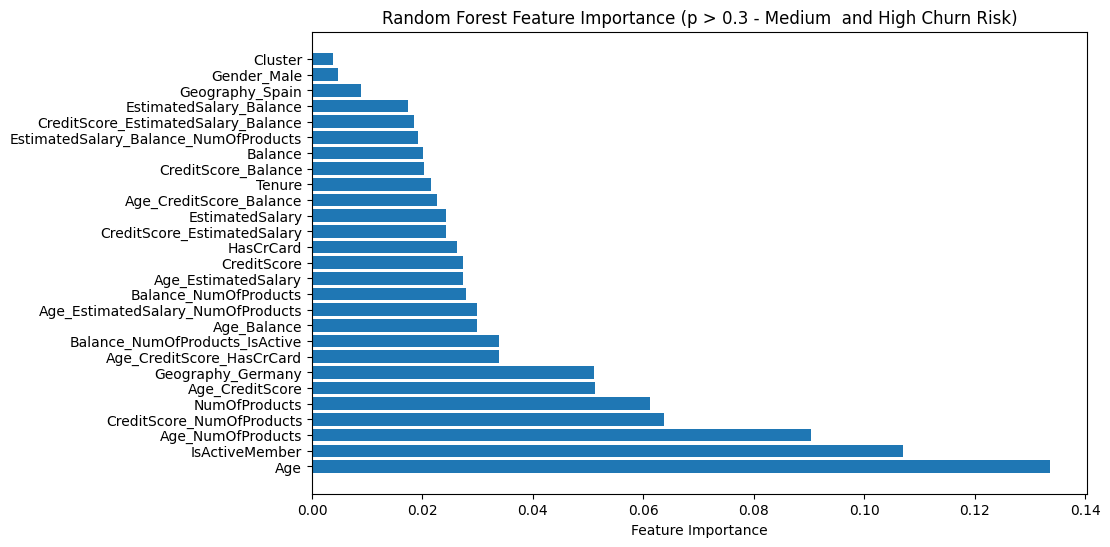

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate churn probabilities for the test set
churn_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Filter customers with 0.3 <= p <= 0.75 (Medium Churn Risk)
medium_churn_indices = (churn_probabilities >= 0.3) & (churn_probabilities <= 0.75)
X_test_medium_churn = X_test[medium_churn_indices]

# Filter customers with p > 0.75 (High Churn Risk)
high_churn_indices = churn_probabilities > 0.75
X_test_high_churn = X_test[high_churn_indices]

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot Feature Importance for Medium Churn Risk
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (p > 0.3 - Medium  and High Churn Risk)')
plt.show()



### Interpretation:

Age:

Interpretation: Younger customers may churn more, while older customers may stay loyal.
Suggestion: Offer promotions for younger customers and stability-focused products for older ones to reduce churn.

Is Active Member:

Interpretation: Active customers are less likely to churn. Inactive ones are at higher risk.
Suggestion: Re-engage inactive users with targeted offers or incentives to keep them active.

Age_numofproducts:

Interpretation: Older customers with more products are loyal. Younger ones may feel overwhelmed.
Suggestion: Offer product bundles or simplify options for younger customers to improve satisfaction.

Credit Score:

Interpretation: Customers with higher credit scores are less likely to churn.
Suggestion: Offer premium services to high-credit-score customers and support to lower-credit ones.

Number of Products:

Interpretation: Customers with more products may stay longer, but too many can overwhelm them.
Suggestion: Ensure each product adds value and offer relevant upsells or cross-sells.

Age_creditscore:

Interpretation: Older customers with better credit scores are less likely to churn.
Suggestion: Focus on younger customers with lower credit scores and offer them solutions to improve.

Geography_Germany:

Interpretation: Customers in Germany may have different preferences and churn more.
Suggestion: Offer region-specific promotions or support to keep German customers.

**Key Suggestions:**

1. Re-engage inactive users with special offers.
2. Simplify products for younger customers.
3. Focus on value for customers with many products.
4. Provide support for customers with low credit scores to prevent churn.

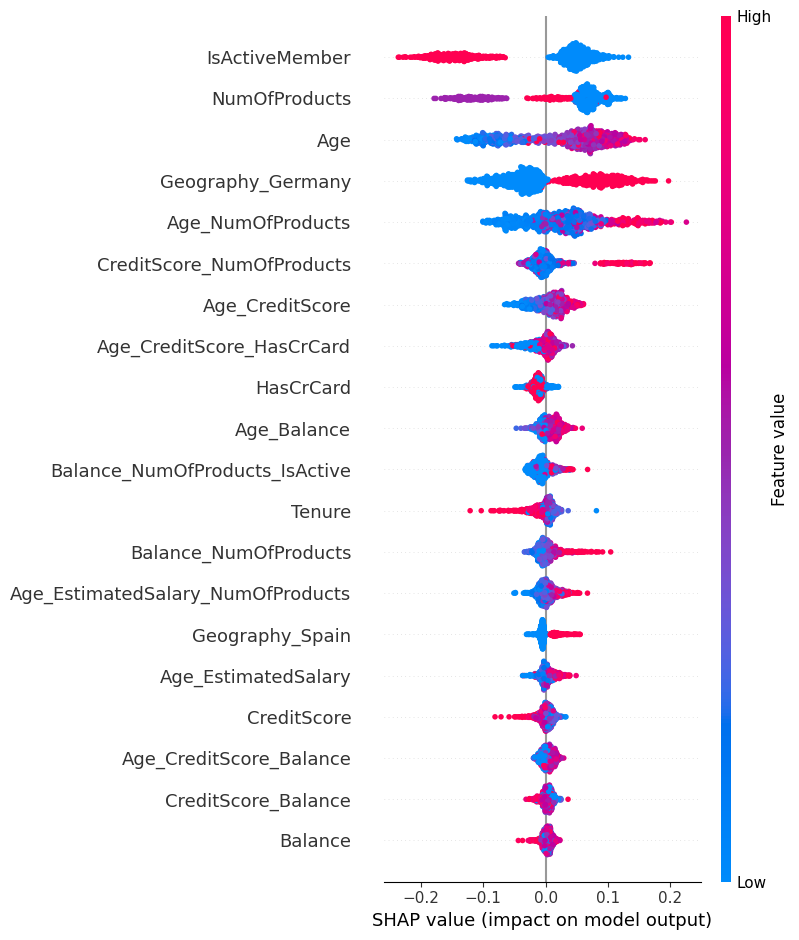

In [31]:
import shap

# Churn probabilities
churn_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Filter customers with p > 0.3 
high_churn_indices = churn_probabilities > 0.3
X_test_high_churn = X_test[high_churn_indices]

X_test_high_churn = pd.DataFrame(X_test_high_churn, columns=X.columns)

# Create SHAP explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for high churn customers
shap_values_high = explainer.shap_values(X_test_high_churn)

# Local Explanation: Force plot for the first high-churn customer
shap.initjs()
shap.force_plot(
    explainer.expected_value[1],
    shap_values_high[1][0],
    X_test_high_churn.iloc[0],  # Now works with DataFrame
    feature_names=X.columns
)

# Global Explanation: SHAP Summary Plot for High Churn Group
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_high[1], X_test_high_churn, feature_names=X.columns)


**Interpretation:**

- **Top Features Impacting Churn:**
  - **IsActiveMember:** Inactive customers are more likely to churn. Keeping them active helps reduce churn.
  - **NumOfProducts:** Fewer products lead to higher churn. Offering more products can reduce churn.
  - **Age:** Older customers have a higher churn risk. Younger customers tend to stay.
  - **Geography_Germany:** Customers from Germany are more likely to churn.

- **Interactions:**
  - **Age and NumOfProducts:** Older customers with fewer products are more likely to churn.
  - **CreditScore and Balance:** Customers with lower credit scores and balances are at higher risk of churn.

- **Other Notable Factors:**
  - **HasCrCard:** Having a credit card doesn't significantly impact churn.
  - **Tenure:** Longer tenure slightly reduces churn risk but is less important than other factors.

---

**Business Insights:**

- **Customer Engagement:** 
  - Engage inactive members with offers and reminders.
  - Cross-sell to customers using fewer products.
  
- **Targeted Retention for Germany:**
  - Create strategies for Germany, such as local promotions or better service.

- **Older Customer Retention:**
  - Focus on retaining older customers with fewer products by offering personalized services.

- **Credit and Balance Management:**
  - Encourage customers with low balances or credit scores to use more products with benefits like savings plans or credit improvement.

- **Tenure-Based Incentives:**
  - Reward long-term customers with loyalty rewards to keep them satisfied.
